In [4]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 4.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 4.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 4.9 MB/

In [1]:
pip install tensorflow==2.7

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.7
Note: you may need to restart the kernel to use updated packages.


In [184]:
#Importing all necessary libarairs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',color_codes=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Input,BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
from sklearn.metrics import roc_curve,auc
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [97]:
# will stop the model when the required accuracy is reached

class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        if logs is None:
            logs={}
        if(logs.get('val_accuracy')>0.98):
            print('\nReached 98% accuracy so cancelling training!')
            self.model.stop_training=True

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
import os

In [14]:
import urllib.request
import zipfile

In [15]:
img_size=[150,150]

In [18]:
#Preprocessing and Augumentaion of images- increasing the diversity of Images by applying random transformation
train_datagen=ImageDataGenerator(rescale=1./255.,
                                rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True)

In [19]:
test_datagen=ImageDataGenerator(rescale=1./255.)

In [21]:
# Resizing images of Train folder
train_generator=train_datagen.flow_from_directory('chest_xray/train',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 target_size=(150,150))

Found 5217 images belonging to 2 classes.


In [22]:
# Resizing images of valisation folder
val_generator=test_datagen.flow_from_directory('chest_xray/val',
                                              batch_size=32,
                                              class_mode='categorical',
                                              target_size=(150,150),
                                              shuffle=False)

Found 16 images belonging to 2 classes.


In [23]:
# Resizing images of Test folder
test_generator=test_datagen.flow_from_directory('chest_xray/test',
                                              batch_size=32,
                                              class_mode='categorical',
                                              target_size=(150,150),
                                              shuffle=False)

Found 624 images belonging to 2 classes.


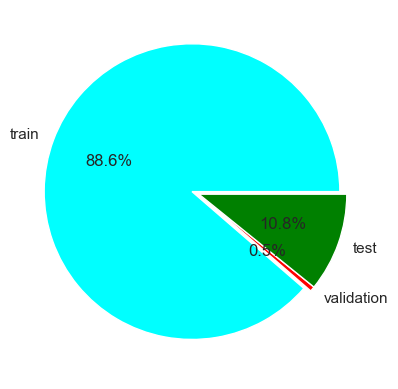

<Figure size 640x480 with 0 Axes>

In [29]:
plt.pie([len(train_generator),len(val_generator),len(test_generator)],labels=['train','validation','test'],
autopct='%.1f%%',colors=['Cyan','red','green'],explode=(0.05,0,0))
plt.show()
plt.savefig('dataset_pie.png')

In [30]:
#checking the indices for the datasets given by the data augmentation
print(train_generator.class_indices)
print(test_generator.class_indices)
print(val_generator.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}


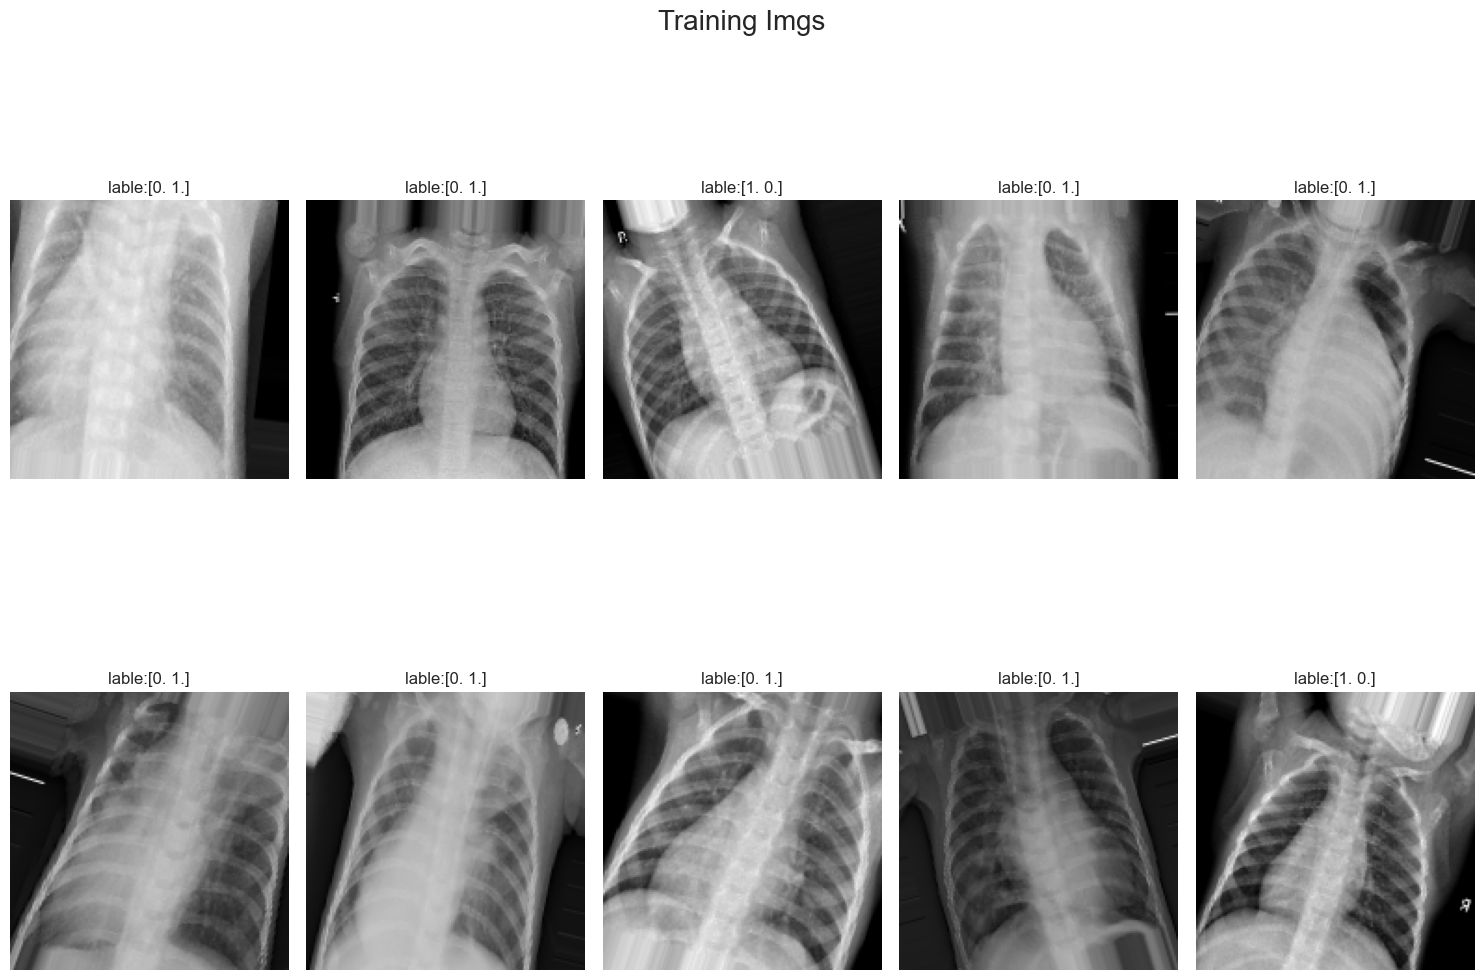

In [37]:
#Visualize few images from train data set and apply the labels to corresponding image

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(15,12))
idx=0
train_data,train_labels=train_generator[0]
for i in range(2):
    for j in range(5):
        label=train_labels[idx]
        ax[i,j].set_title(f'lable:{label}')
        ax[i,j].imshow(train_data[idx])
        ax[i,j].axis('off')
        idx+=1

plt.tight_layout()
plt.suptitle('Training Imgs',fontsize=20)
plt.show()

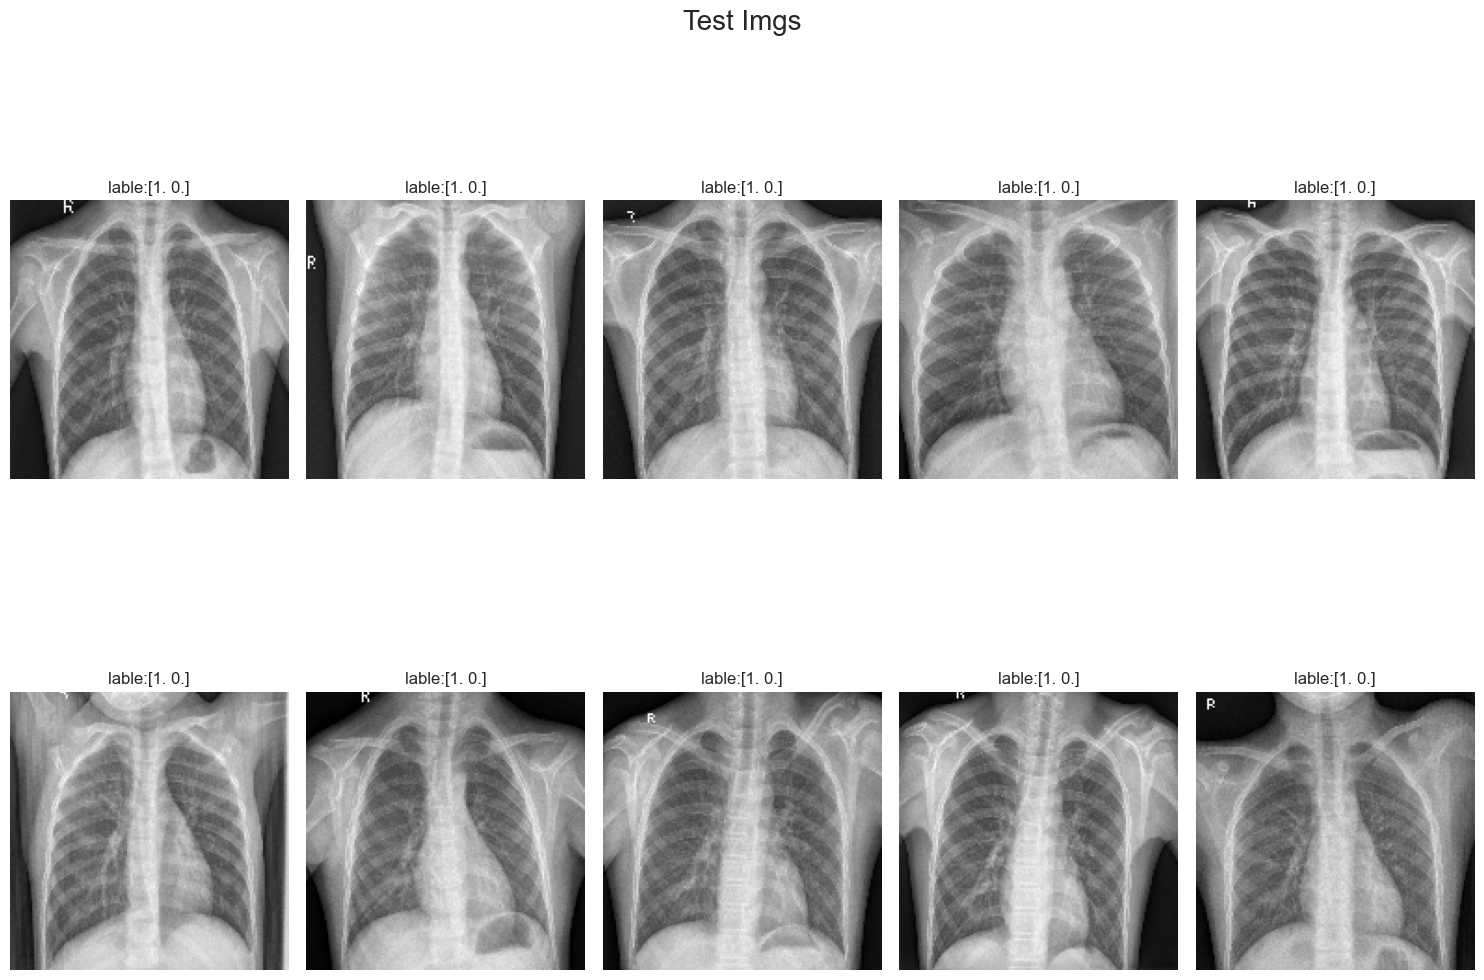

In [39]:
#Visualize few images from test data set and apply the labels to corresponding image

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(15,12))
idx=0
train_data,train_labels=test_generator[0]
for i in range(2):
    for j in range(5):
        label=train_labels[idx]
        ax[i,j].set_title(f'lable:{label}')
        ax[i,j].imshow(train_data[idx])
        ax[i,j].axis('off')
        idx+=1

plt.tight_layout()
plt.suptitle('Test Imgs',fontsize=20)
plt.show()

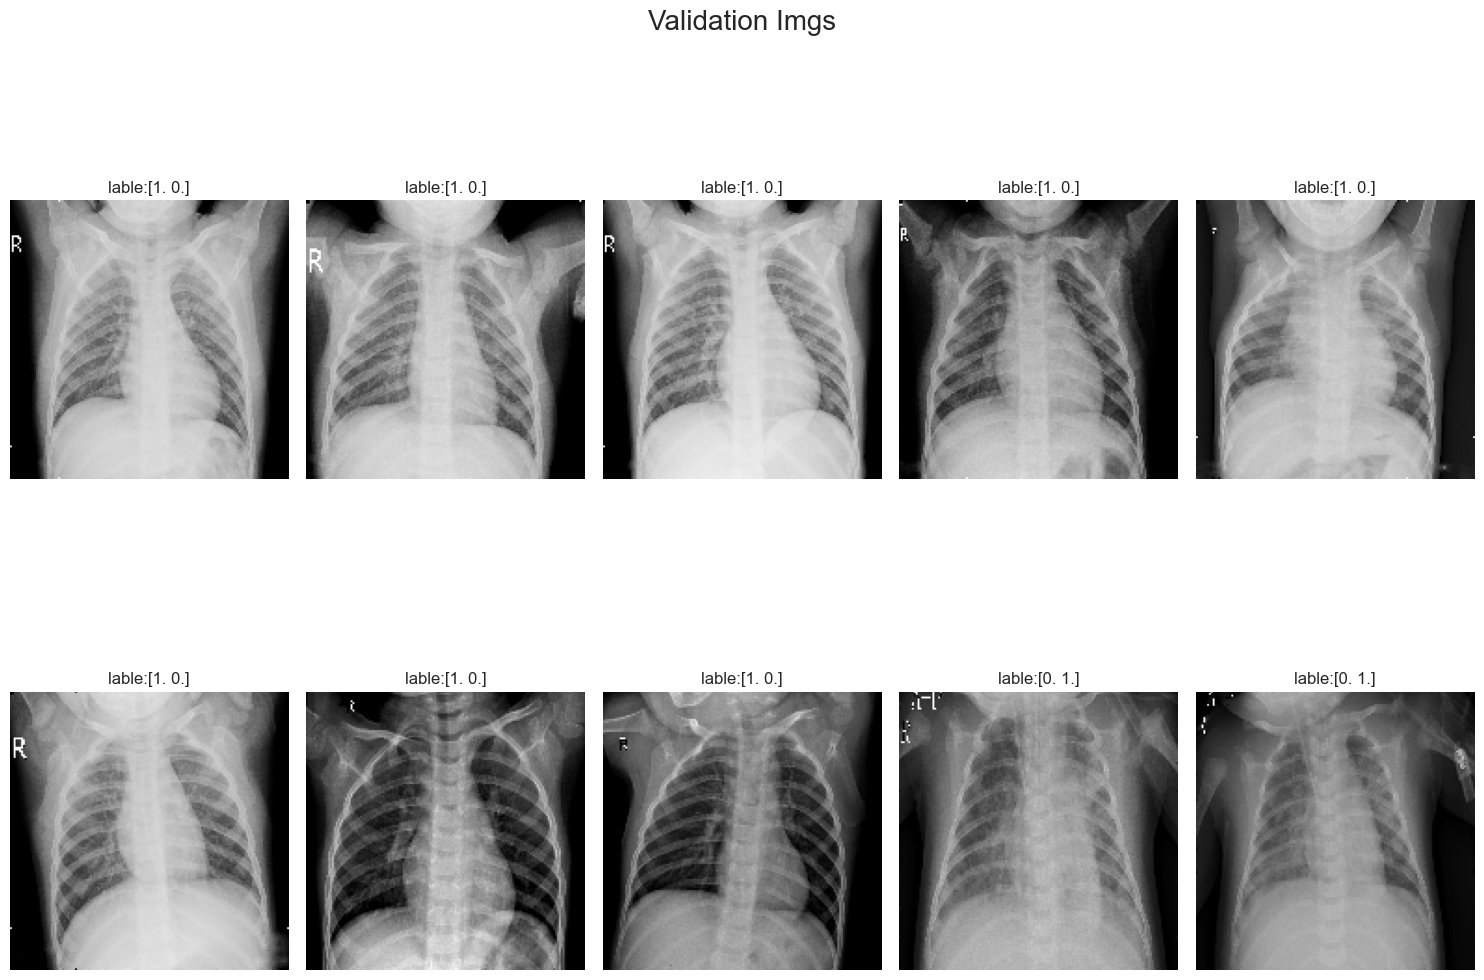

In [40]:
#Visualize few images from validation data set and apply the labels to corresponding image

fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(15,12))
idx=0
train_data,train_labels=val_generator[0]
for i in range(2):
    for j in range(5):
        label=train_labels[idx]
        ax[i,j].set_title(f'lable:{label}')
        ax[i,j].imshow(train_data[idx])
        ax[i,j].axis('off')
        idx+=1

plt.tight_layout()
plt.suptitle('Validation Imgs',fontsize=20)
plt.show()

Normal


<function matplotlib.pyplot.show(close=None, block=None)>

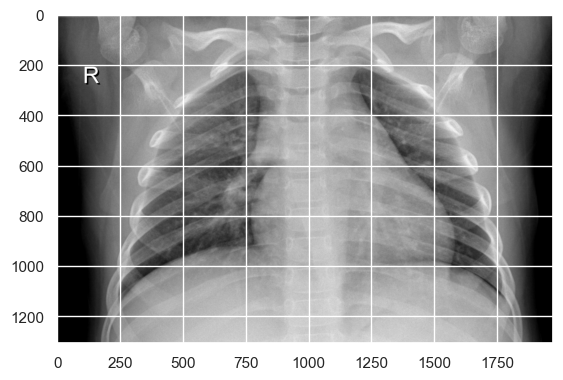

In [42]:
# Vidualizing one specific image of Normal chest

train_normal=load_img('chest_xray/train/Normal/IM-0127-0001.jpeg')
print('Normal')
plt.imshow(train_normal)
plt.show

Normal


<function matplotlib.pyplot.show(close=None, block=None)>

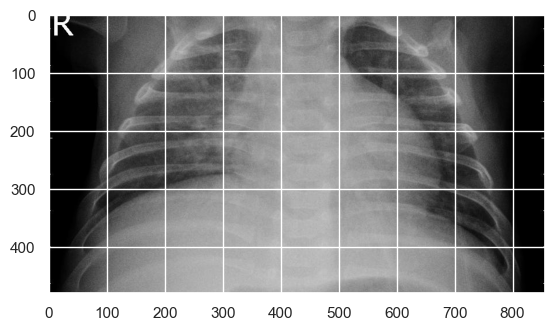

In [45]:
# Vidualizing one specific image of pneumonia with virus chest

train_PNEUMONIA=load_img('chest_xray/train/PNEUMONIA/person1004_virus_1686.jpeg')
print('Normal')
plt.imshow(train_PNEUMONIA)
plt.show

Normal


<function matplotlib.pyplot.show(close=None, block=None)>

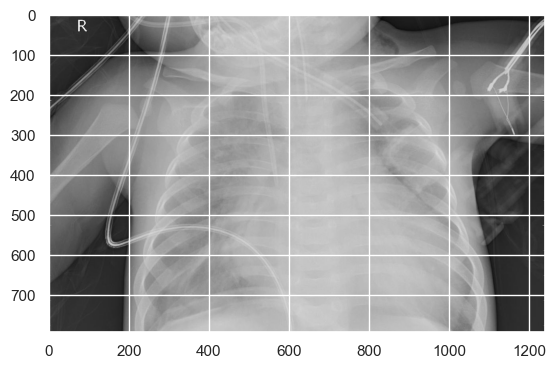

In [46]:
# Vidualizing one specific image of pneumonia with bacterial infection chest

train_PNEUMONIA=load_img('chest_xray/train/PNEUMONIA/person1008_bacteria_2939.jpeg')
print('Normal')
plt.imshow(train_PNEUMONIA)
plt.show

In [48]:
import os
import glob

In [56]:
dataset_directory='chest_xray'

In [57]:
datasets=['train','test','val']
pneumonia_lung=[]
normal_lung=[]

In [58]:
for dataset in datasets:
    path=os.path.join(dataset_directory,dataset)
    normal=glob.glob(os.path.join(path,'Normal/*.jpeg'))
    pneumonia=glob.glob(os.path.join(path,'PNEUMONIA/*.jpeg'))
    normal_lung.extend(normal)
    pneumonia_lung.extend(pneumonia)

print('No of img of pneumonia =',len(pneumonia_lung))
print('No of img of normal-pneumonia =',len(normal_lung))

No of img of pneumonia = 4273
No of img of normal-pneumonia = 1583


In [59]:
import random

In [60]:
random.shuffle(normal_lung)
random.shuffle(pneumonia_lung)
images=normal_lung[:50]+pneumonia_lung[:50]
images[:10]

['chest_xray/train/Normal/NORMAL2-IM-1020-0001-0001.jpeg',
 'chest_xray/test/Normal/NORMAL2-IM-0337-0001.jpeg',
 'chest_xray/train/Normal/IM-0598-0001.jpeg',
 'chest_xray/train/Normal/NORMAL2-IM-1150-0001.jpeg',
 'chest_xray/train/Normal/NORMAL2-IM-0395-0001-0001.jpeg',
 'chest_xray/train/Normal/IM-0664-0001.jpeg',
 'chest_xray/train/Normal/IM-0678-0001.jpeg',
 'chest_xray/train/Normal/IM-0687-0001.jpeg',
 'chest_xray/train/Normal/NORMAL2-IM-0887-0001.jpeg',
 'chest_xray/train/Normal/IM-0679-0001.jpeg']

In [61]:
import cv2

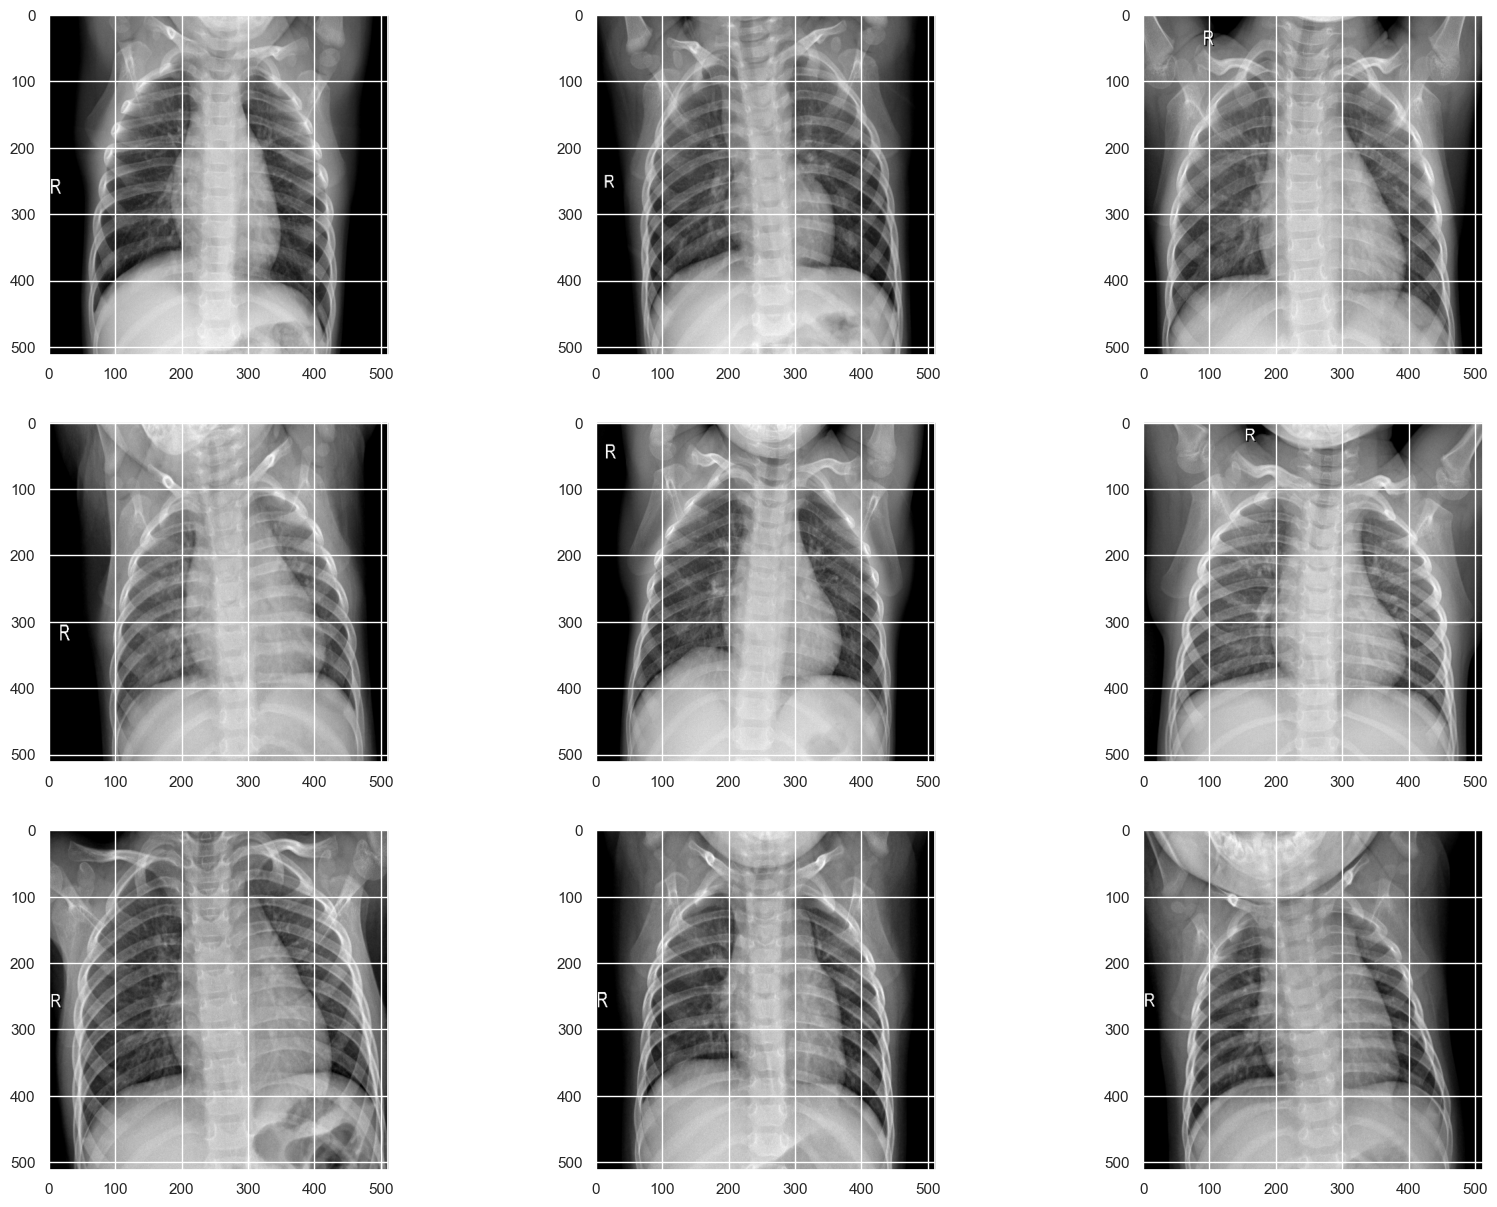

In [66]:
fig=plt.figure(figsize=(20,15))
columns,rows=3,3

for i in range(1,10):
    img=cv2.imread(images[i])
    img=cv2.resize(img,(512,512))
    fig.add_subplot(rows,columns,i)
    plt.imshow(img)

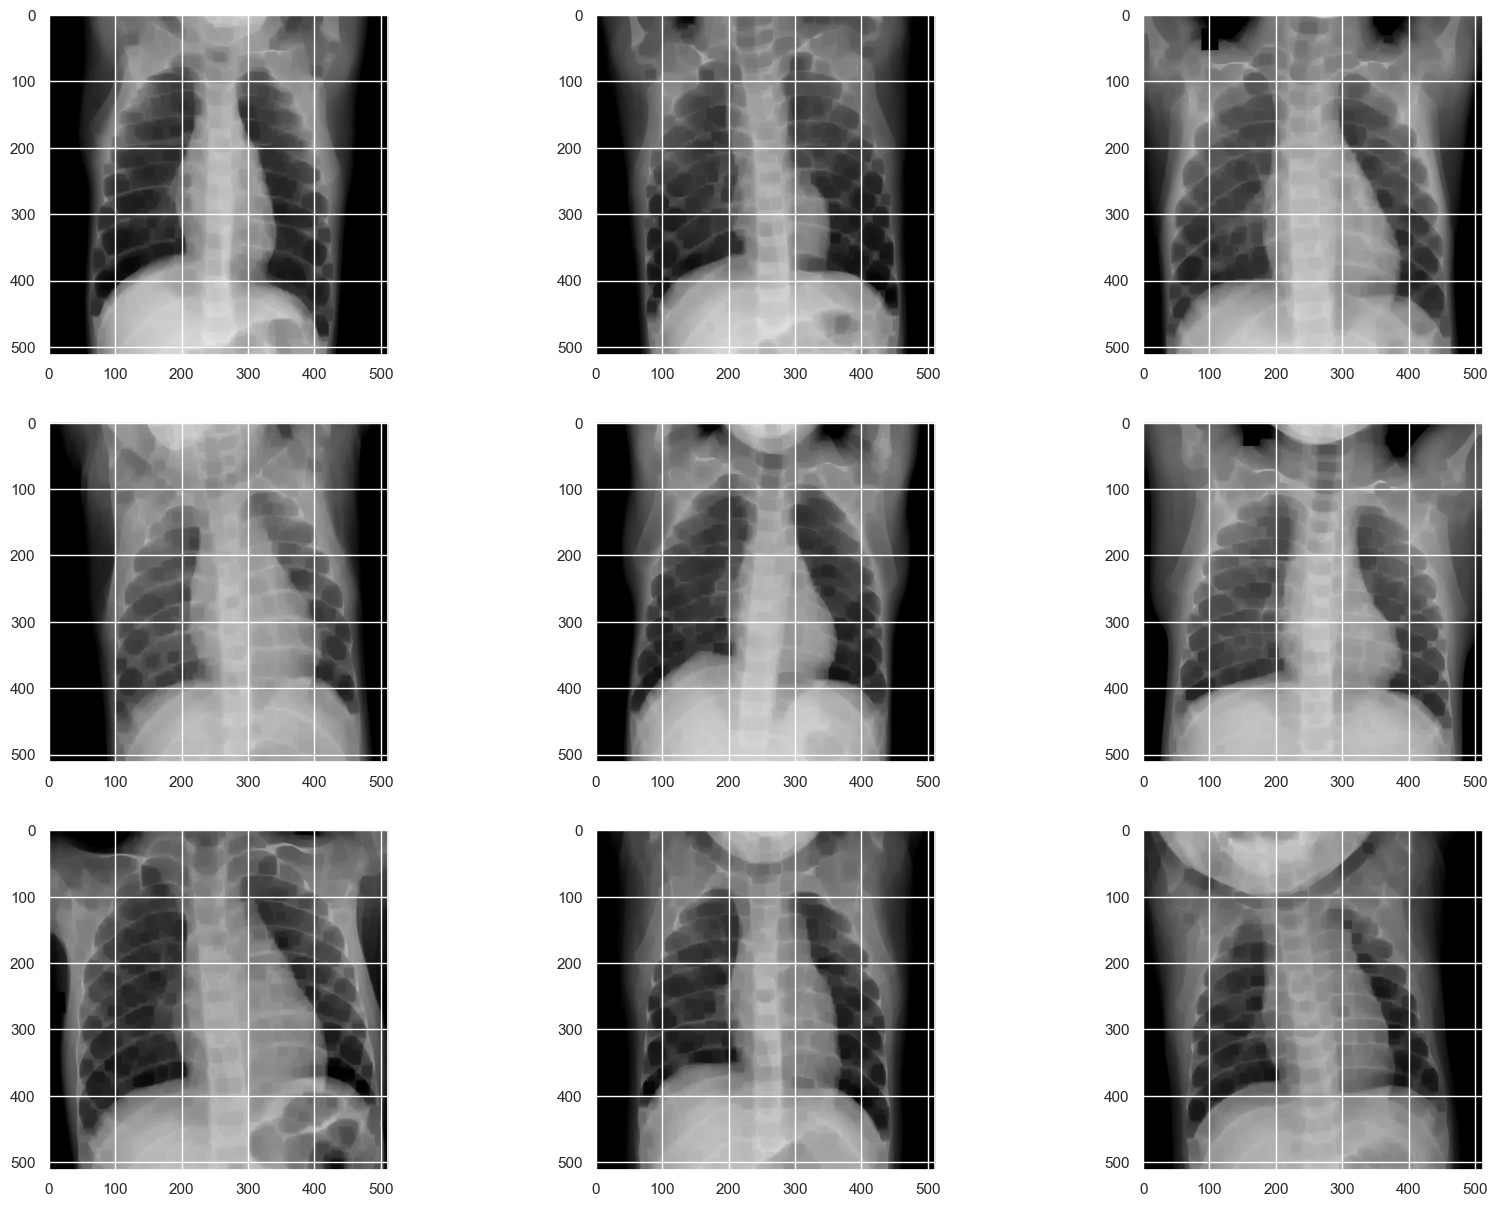

In [70]:
#img errosion
fig=plt.figure(figsize=(20,15))
columns,rows=3,3

for i in range(1,10):
    img=cv2.imread(images[i])
    img=cv2.resize(img,(512,512))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    kernel=np.ones((5,5),np.uint8)
    img_errosion=cv2.erode(img,kernel,iterations=3)
    fig.add_subplot(rows,columns,i)
    plt.imshow(img_errosion)

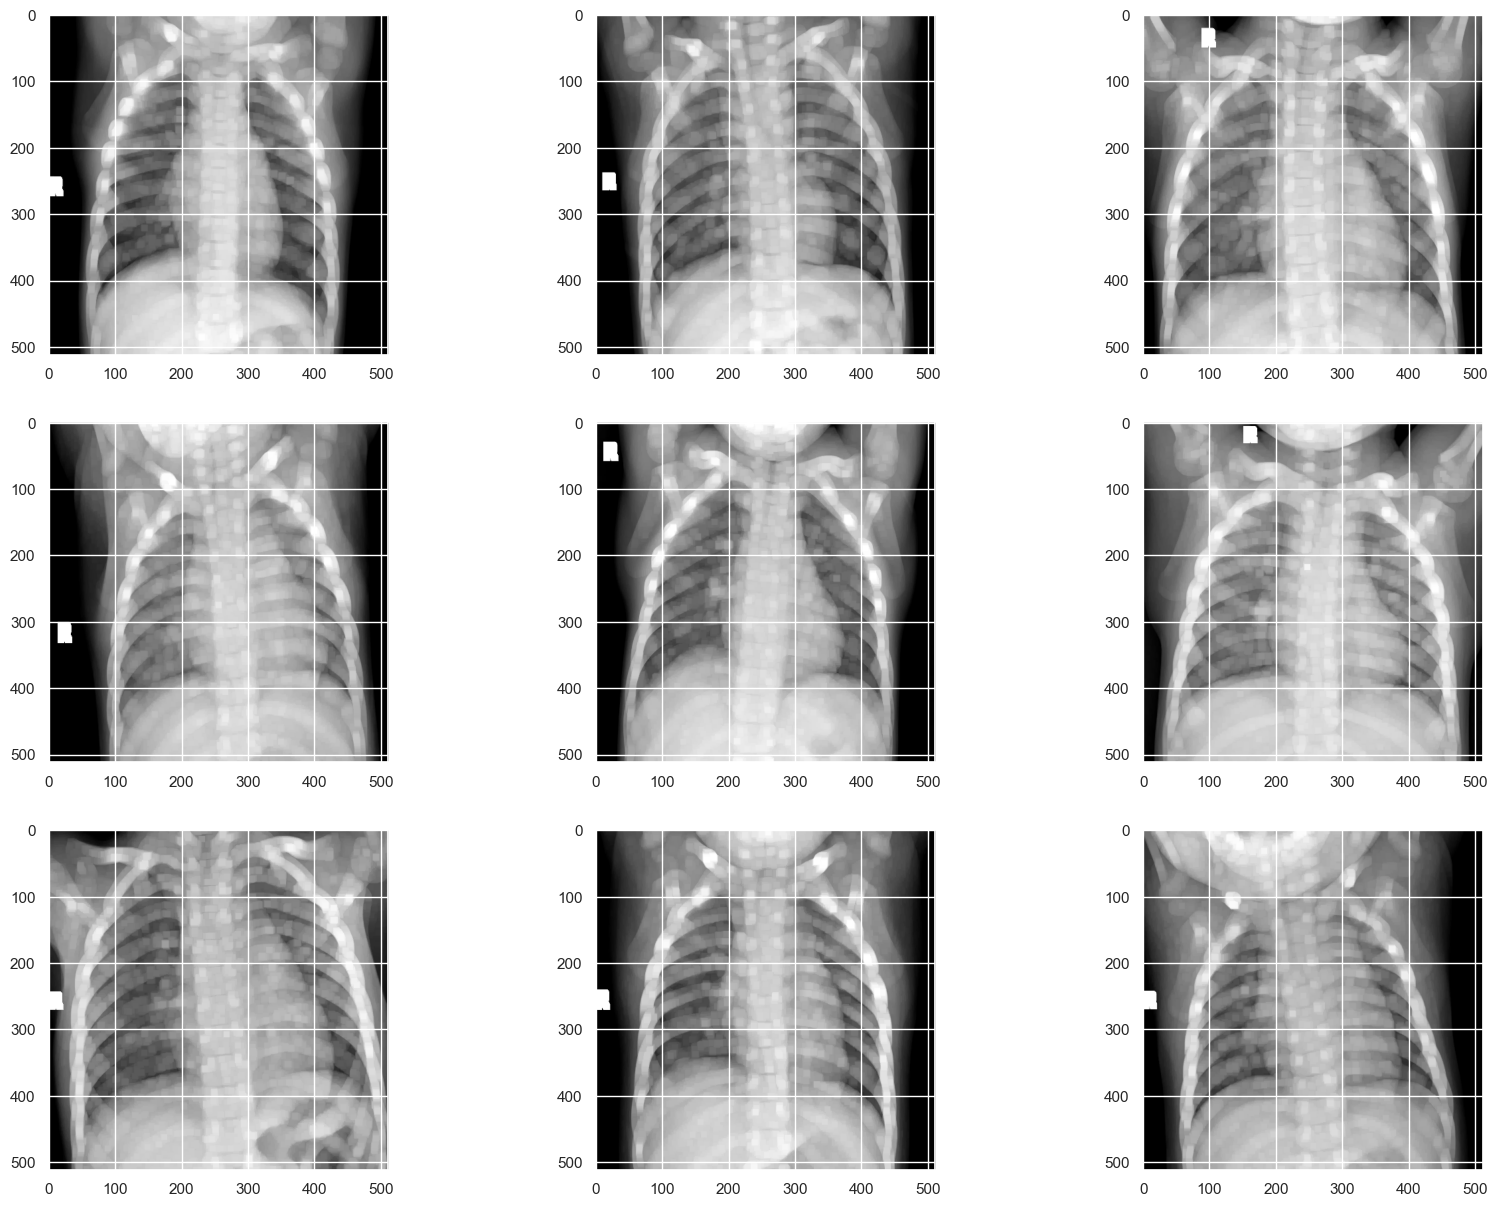

In [72]:
#Image dilation
fig=plt.figure(figsize=(20,15))
columns,rows=3,3

for i in range(1,10):
    img=cv2.imread(images[i])
    img=cv2.resize(img,(512,512))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    kernel=np.ones((5,5),np.uint8)
    img_dilation=cv2.dilate(img,kernel,iterations=2)
    fig.add_subplot(rows,columns,i)
    plt.imshow(img_dilation)

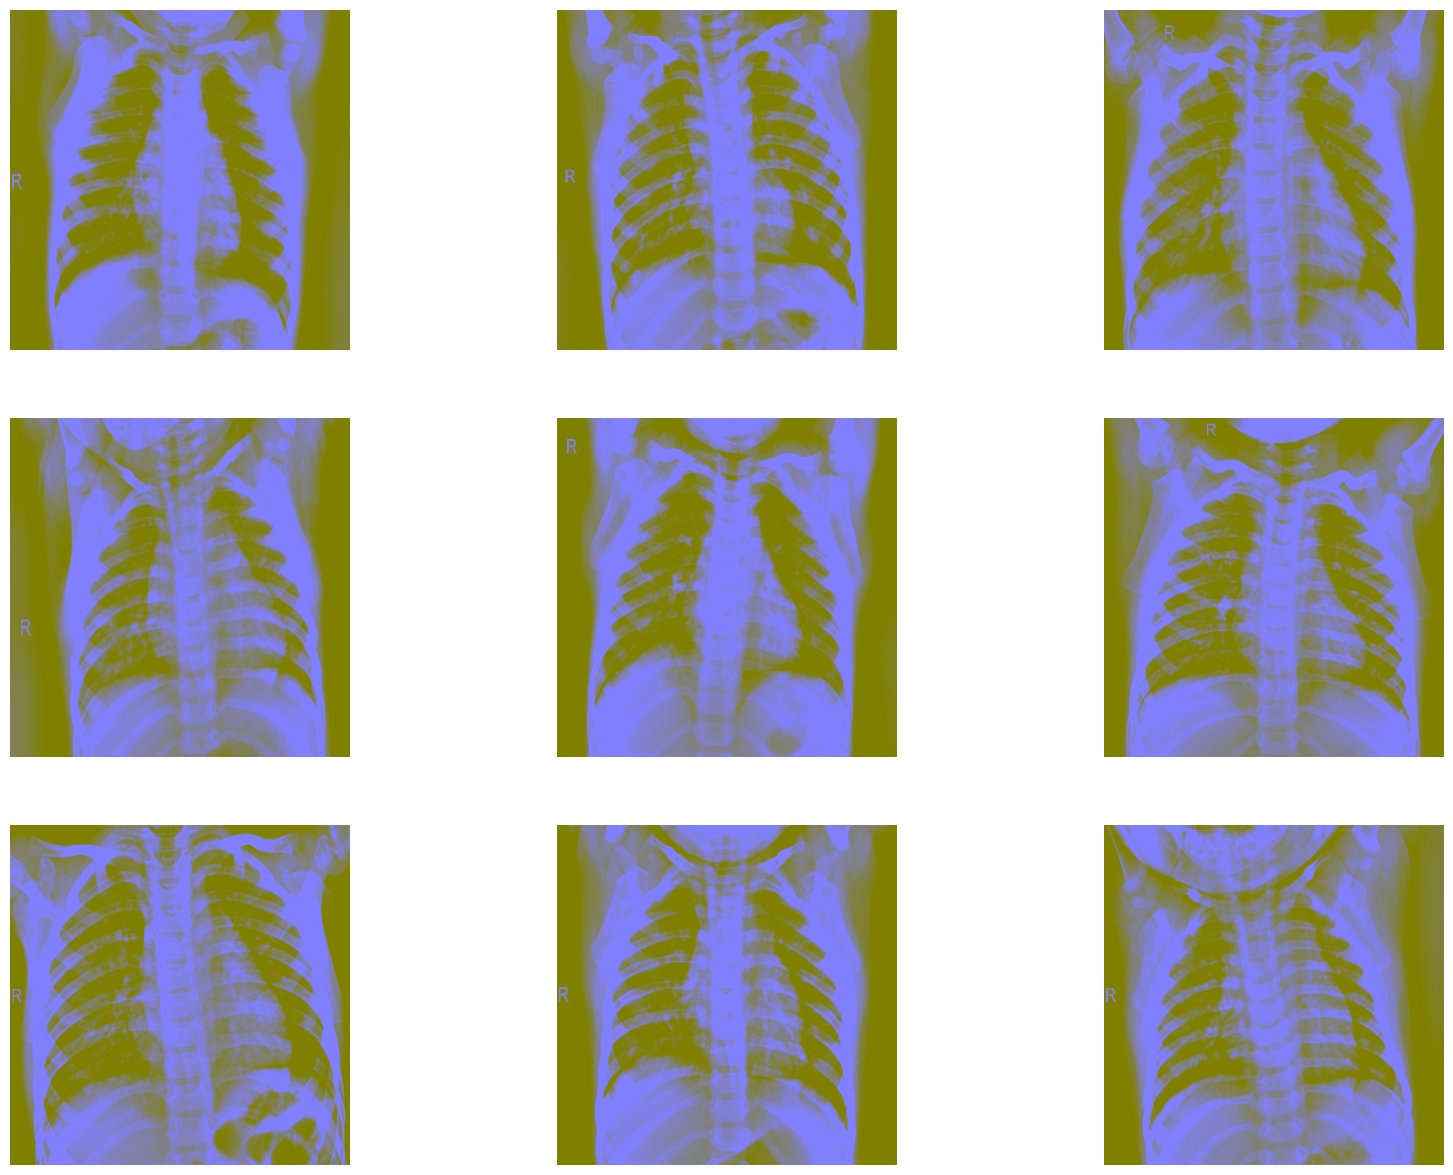

In [78]:
#Convert images --> grayscale then apply Gaussain blur
fig=plt.figure(figsize=(20,15))
col,row=3,3

for i in range(1,10):
    img=cv2.imread(images[i])
    img=cv2.resize(img,(512,512))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    img=cv2.addWeighted(img,4,cv2.GaussianBlur(img,(0,0),512/10),-4,128)
    fig.add_subplot(row,col,i)
    plt.imshow(img)
    plt.axis(False)

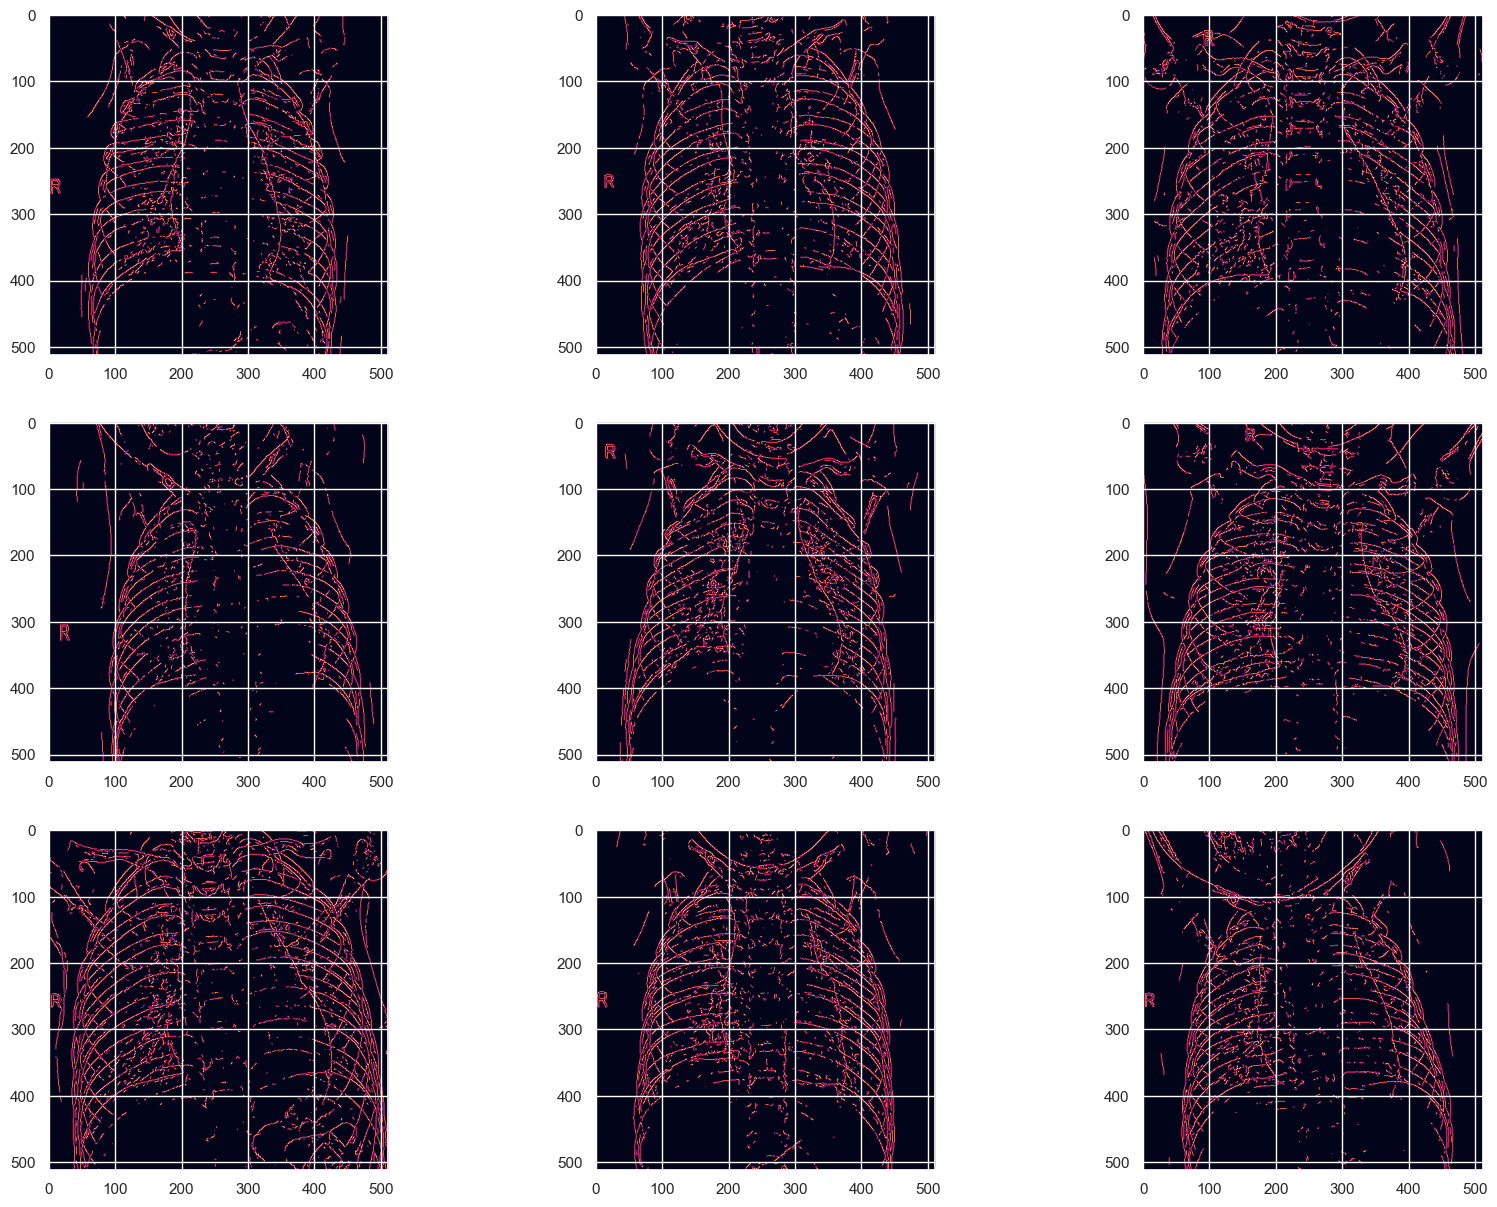

In [80]:
#Canny edge detection

fig=plt.figure(figsize=(20,15))
col,row=3,3

for i in range(1,10):
    img=cv2.imread(images[i])
    img=cv2.resize(img,(512,512))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    detected_edges=cv2.Canny(img,80,100)
    fig.add_subplot(row,col,i)
    plt.imshow(detected_edges)

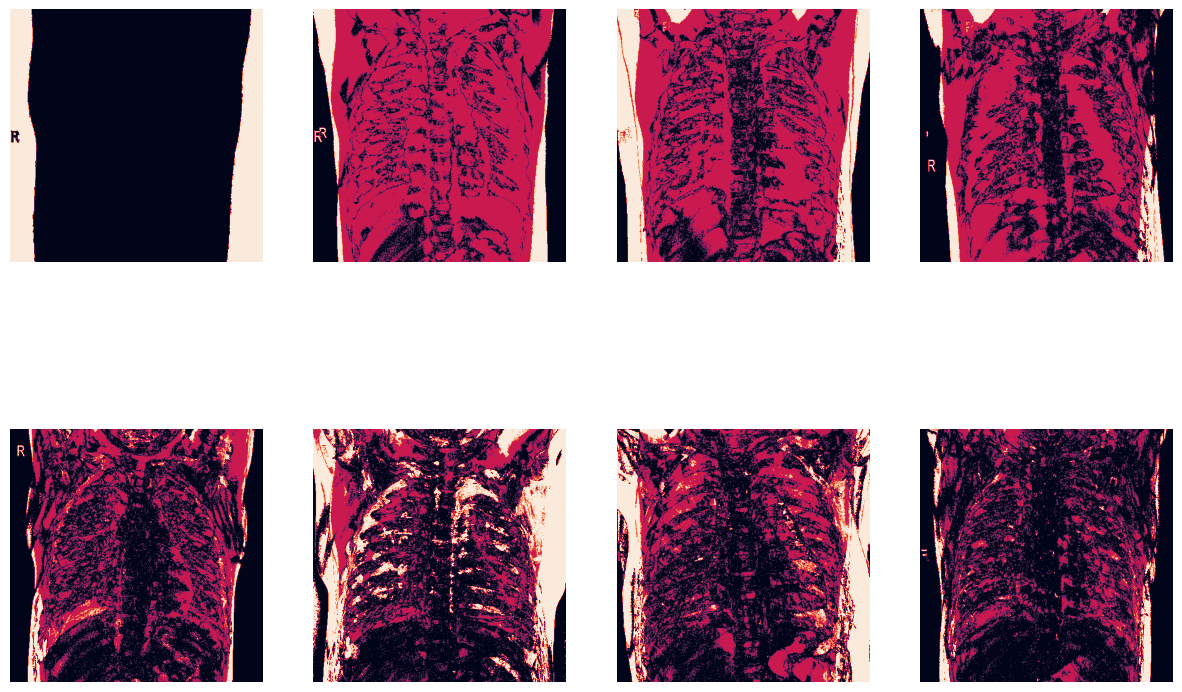

In [83]:
#Remove background
fgbg=cv2.createBackgroundSubtractorMOG2()

fig=plt.figure(figsize=(15,10))
col=4;row=2

for i in range(1,col*row+1):
    img=cv2.imread(images[i])
    img=cv2.resize(img,(512,512))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=fgbg.apply(img)
    fig.add_subplot(row,col,i)
    plt.imshow(img)
    plt.axis(False)

In [90]:
# Model Building CNN

model1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(150,150,3),name='C1'),
    
                          tf.keras.layers.MaxPooling2D(2,2),
    
                          tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='C2'),
    
                          tf.keras.layers.MaxPooling2D(2,2),
                          
                          tf.keras.layers.Flatten(),
                          
                          tf.keras.layers.Dense(512,activation='relu',name='d1'),
                          
                          tf.keras.layers.BatchNormalization(),
                          
                          tf.keras.layers.Dropout(0.25),
                          
                          tf.keras.layers.Dense(2,activation='sigmoid')
                          ])

In [92]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C2 (Conv2D)                     │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ d1 (Dense)                      │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,242,338 (81.03 MB)

 Trainable params: 21,241,314 (81.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [98]:
import time

start=time.time()

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks=mycallback()

history=model1.fit(train_generator,
                  validation_data=val_generator,
                  epochs=5,
                  callbacks=[callbacks]
                  )

end=time.time()

elapsed=end-start

print('Time required',elapsed)

Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 52s 299ms/step - accuracy: 0.9143 - loss: 0.2216 - val_accuracy: 0.6875 - val_loss: 0.6131
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - accuracy: 0.9276 - loss: 0.1850 - val_accuracy: 0.5625 - val_loss: 1.6196
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 300ms/step - accuracy: 0.9231 - loss: 0.1925 - val_accuracy: 0.5000 - val_loss: 2.6204
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 300ms/step - accuracy: 0.9345 - loss: 0.1735 - val_accuracy: 0.9375 - val_loss: 0.2483
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.9342 - loss: 0.1716 - val_accuracy: 0.8750 - val_loss: 0.2457
Time required 256.9164900779724


In [106]:
#Accuracy of Model

loss,accuracy=model1.evaluate(val_generator)
print('Accuracy = ', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8750 - loss: 0.2457
Accuracy =  0.875


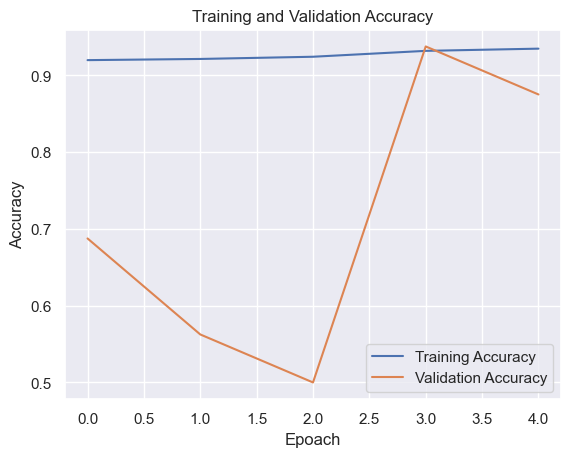

In [108]:
#Plot Accuracy
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoach')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


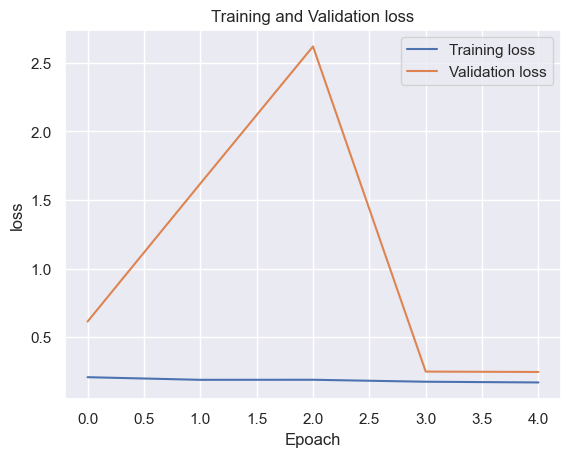

In [109]:
#Loss Plot

plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoach')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [120]:
#Classification report

y_pred=model1.predict(val_generator)
y_pred=np.argmax(y_pred,axis=1)

#confusion matrix
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes,y_pred))

target_names=['Normal','Pneumonia']
print('Classification Report')
print(classification_report(val_generator.classes,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Confusion Matrix
[[6 2]
 [0 8]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.80      1.00      0.89         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



In [123]:
#Confusion Matrix

num_samples=100
true_labels=[]
predictions=[]

for i,(x,y) in enumerate(test_generator):
    if i>=num_samples:
        break
    true_labels.extend(y)
    predictions.extend(model1.predict(x))


true_labels=np.concatenate(true_labels)
predictions=np.concatenate(predictions)
binary_predictions=np.round(predictions)

conf_mat=confusion_matrix(true_labels,binary_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

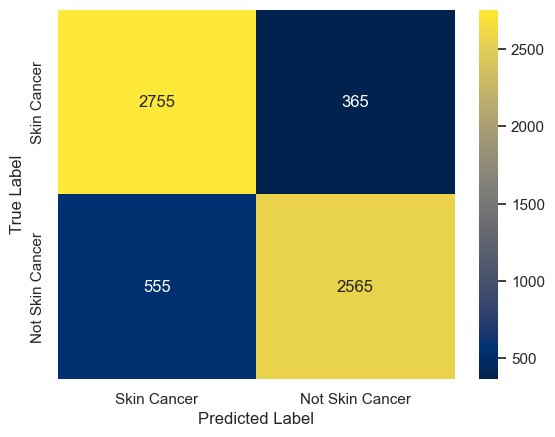

In [132]:
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='cividis',xticklabels=['Skin Cancer','Not Skin Cancer'],
           yticklabels=['Skin Cancer','Not Skin Cancer'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [135]:
#Specify

def calculate_specificity(y_true,y_pred):
    true_negative=np.sum((y_true ==0) & (y_pred ==0))
    actual_negative=np.sum(y_true==0)
    specificity=true_negative/actual_negative
    return specificity


specificity=calculate_specificity(true_labels,binary_predictions)
print('specificity =',specificity)

specificity = 0.8830128205128205


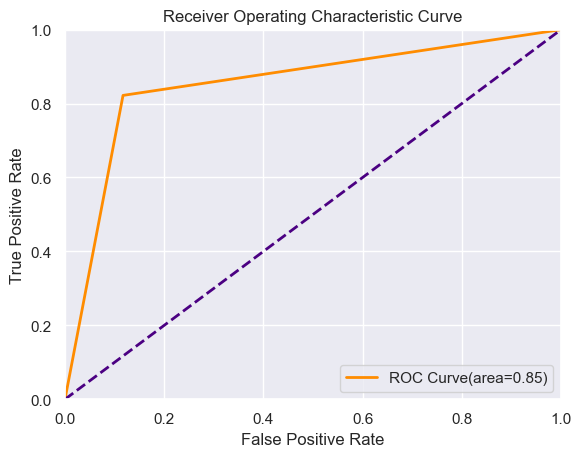

In [142]:
#ROC Curve

fpr,tpr,_=roc_curve(true_labels,binary_predictions)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC Curve(area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='indigo',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [145]:
#Compute ROC curve and ROC area

fpr,tpr,thresholds=roc_curve(true_labels,binary_predictions)
roc_auc=auc(fpr,tpr)

print('Auc',roc_auc)

Auc 0.8525641025641025


In [146]:
#precision-recall curve
from sklearn.metrics import precision_recall_curve,average_precision_score

In [147]:
precision,recall,_=precision_recall_curve(true_labels,binary_predictions)
avg_precision=average_precision_score(true_labels,binary_predictions)

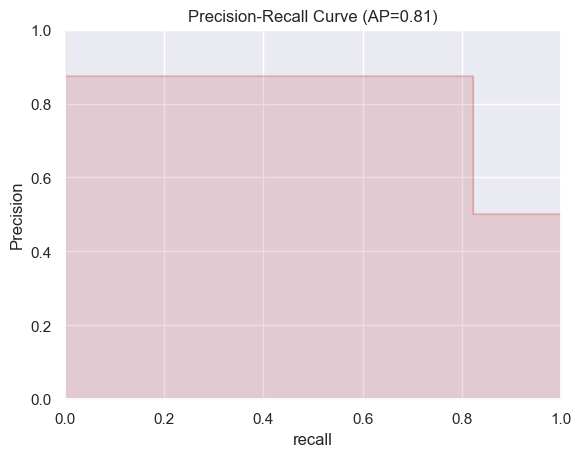

In [152]:
#plot precision_recall_curve
plt.figure()
plt.step(recall,precision,color='r',alpha=0.2,where='post')
plt.fill_between(recall,precision,step='post',alpha=0.2,color='r')
plt.xlabel('recall')
plt.ylabel('Precision')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Precision-Recall Curve (AP=%0.2f)' %avg_precision)
plt.show()

In [153]:
#PR AUC
print('PR AUC :',avg_precision)

PR AUC : 0.8086440010501444


In [164]:
from sklearn.metrics import r2_score
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

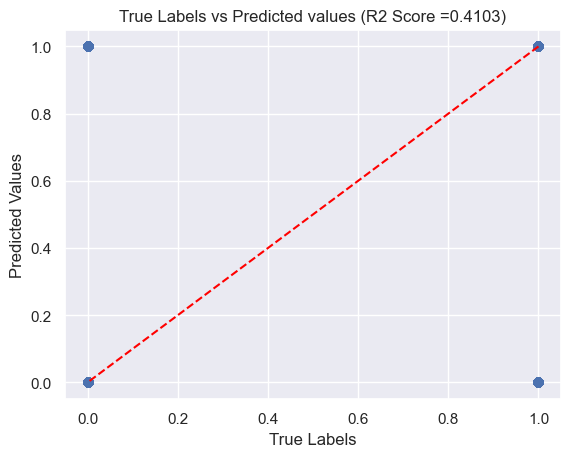

R2 Score = 0.41025641025641024


In [161]:
#R2 Score plot

r2=r2_score(true_labels,binary_predictions)

#plot true values vs predicted values
plt.figure()
plt.scatter(true_labels,binary_predictions,alpha=0.5)
plt.plot(true_labels,true_labels,color='red',linestyle='--')
plt.xlabel('True Labels')
plt.ylabel('Predicted Values')
plt.title('True Labels vs Predicted values (R2 Score =%0.4f)'%r2)
plt.grid(True)
plt.show()

print('R2 Score =',r2)

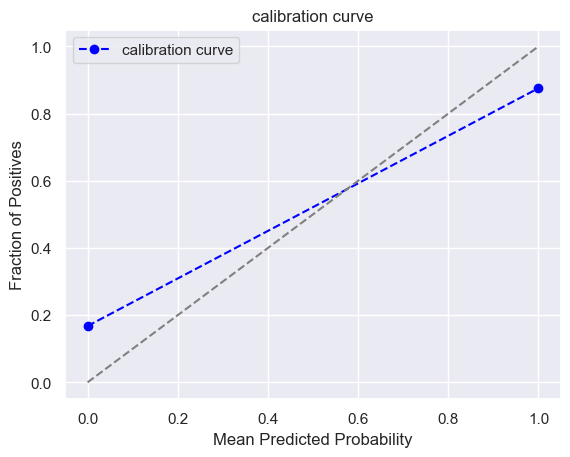

In [163]:
#Caliberation Curve

prob_true,prob_pred=calibration_curve(true_labels,binary_predictions,n_bins=10)

#plot calibratio curve
plt.figure()
plt.plot(prob_pred,prob_true,marker='o',linestyle='--',color='blue',label='calibration curve')
plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('calibration curve')
plt.legend()
plt.show()

In [165]:
#Brier Score

berier_score=brier_score_loss(true_labels,binary_predictions)
print('Berier Score:',berier_score)

Berier Score: 0.14743589743589744


In [170]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

In [174]:
def get_img_array(img_path,size):
    img=image.load_img(img_path,target_size=size)
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)
    return img_array

In [178]:
def make_gradcam_heatmap(img_array,model,last_conv_layer_name,pre_index=None):
    grad_model=Model(model.inputs,[model.get_layer(last_conv_layer_name).output,model.input])
    with tf.GradientTape()as Tape:
            last_conv_layer_output,preds=grad_model(img_array)
            if pred_index is None:
                pred_index=tf.argmax(pred[0])
            class_channel=preds[:,pred_index]
    grads=tape.gradient(class_channel,last_conv_layer_output)
    pooled_grads=tf.reduce_mean(grads,axis=(0,1,2))

    last_conv_layer_output=last_conv_layer_output[0]
    heatmap=last_conv_layer_output @ pooled_grads[...,tf.newaxis]
    heatmap=tf.squeeze(heatmap)
    heatmap=tf.maximum(heatmap,0)/tf.reduce_max(heatmap)
    return heatmap.np()

In [180]:
def display_gradcam(img_path,heatmap,alpha=0.4):
    img=image.load(img_path)
    img=image.img_to_array(img)

    heatmap=np.unit8(255*heatmap)

    heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    heatmap=cv2.applyColor(heatmao,cv2.COLORMAP_JET)
    superimposed_img=heatmap*alpha+img

    cv2.imwrite('gradcam.jpg',superimposed_img)
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

In [182]:
model=VGG16(weights='imagenet')

img_path='test/NORMAL/IM-0001-0001.jpg'

target_class_index=None

last_conv_layer_name='block5_conv3'

img_array=get_img_array(img_path,size=(224,224))

heatmap=make_gradcam_heatmap(img_array,model,last_conv_layer_name,target_class_index)

display_gradcam(img_path,heatmap)

341377024/553467096 ━━━━━━━━━━━━━━━━━━━━ 9:20 3us/step

KeyboardInterrupt: 

In [186]:
#CNN Model2

model2=Sequential()

model2.add(Conv2D(filters=8,kernel_size=(7,7),padding='same',activation='relu',input_shape=(150,150,3)))
model2.add(Conv2D(filters=8,kernel_size=(7,7),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))

model2.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu'))
model2.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(3,3)))

model2.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(2,activation='sigmoid'))

optimizer=Adam(learning_rate=0.0001,decay=1e-5)

model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [191]:
import time

start=time.time()

callbacks=mycallback()

history2=model2.fit(train_generator,
                   validation_data=val_generator,
                   epochs=5,
                   callbacks=[callbacks])

end=time.time()

elapsed=end-start

print('Total Time take:',elapsed)

Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 482ms/step - accuracy: 0.7310 - loss: 0.6157 - val_accuracy: 0.5000 - val_loss: 0.8286
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 89s 534ms/step - accuracy: 0.7594 - loss: 0.5245 - val_accuracy: 0.7500 - val_loss: 0.5971
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 93s 555ms/step - accuracy: 0.8654 - loss: 0.3188 - val_accuracy: 0.7500 - val_loss: 0.5303
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 94s 561ms/step - accuracy: 0.8956 - loss: 0.2665 - val_accuracy: 0.5625 - val_loss: 0.5979
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 95s 569ms/step - accuracy: 0.9047 - loss: 0.2330 - val_accuracy: 0.8750 - val_loss: 0.4612
Total Time take: 454.25818371772766


"\n    import time\n    \n    start=time.time()\n    \n    model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])\n    \n    callbacks=mycallback()\n    \n    history=model1.fit(train_generator,\n                      validation_data=val_generator,\n                      epochs=5,\n                      callbacks=[callbacks]\n                      )\n    \n    end=time.time()\n    \n    elapsed=end-start\n    \n    print('Time required',elapsed)\n\n"

In [195]:
loss,accuracy=model2.evaluate(val_generator)
print('Accuracy :',accuracy1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8750 - loss: 0.4612
Accuracy : 0.875


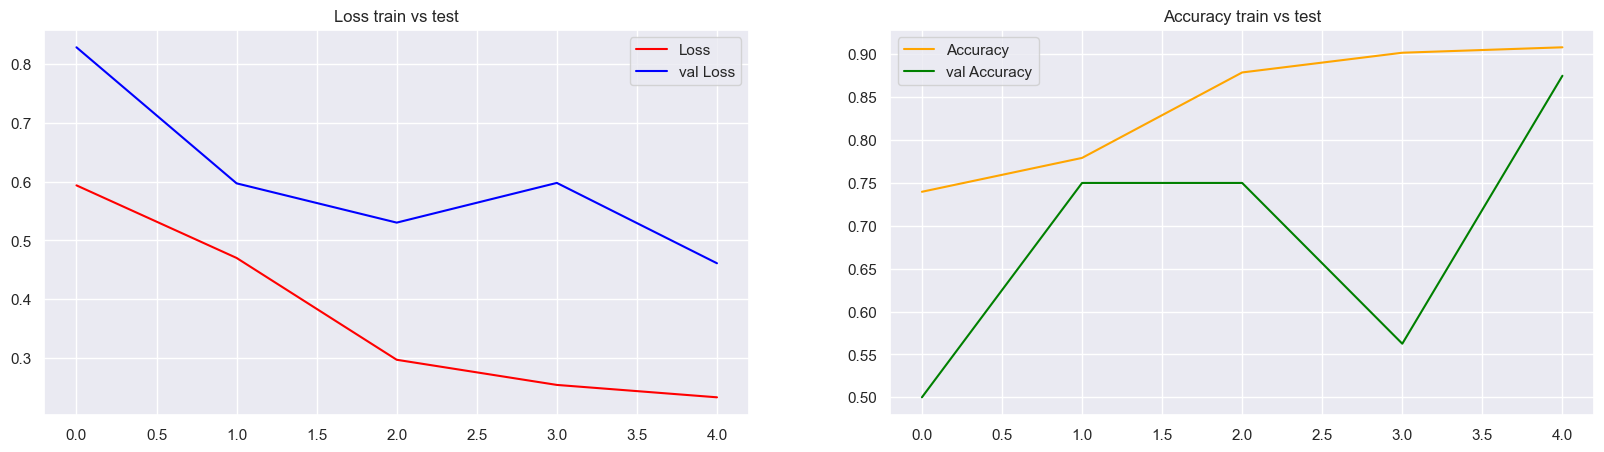

In [201]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.lineplot(x=history2.epoch,y=history2.history['loss'],color='red',label='Loss')
sns.lineplot(x=history2.epoch,y=history2.history['val_loss'],color='blue',label='val Loss')

plt.title('Loss train vs test')

plt.legend(loc='best')

plt.subplot(1,2,2)

sns.lineplot(x=history2.epoch,y=history2.history['accuracy'],color='orange',label='Accuracy')
sns.lineplot(x=history2.epoch,y=history2.history['val_accuracy'],color='green',label='val Accuracy')

plt.title('Accuracy train vs test')

plt.legend(loc='best')

In [203]:
#CNN3

from tensorflow.keras import layers,models,regularizers

model3=tf.keras.Sequential()

model3.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation=tf.nn.relu,input_shape=(150,150,3)))
model3.add(layers.MaxPool2D())

model3.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation=tf.nn.relu))
model3.add(layers.MaxPool2D())

model3.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation=tf.nn.relu))
model3.add(layers.MaxPool2D())

model3.add(layers.Flatten())
model3.add(layers.Dense(256,activation='relu'))
model3.add(layers.Dense(2,activation=tf.nn.sigmoid))

In [205]:
print(model3.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 34, 34, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     1,184,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,194,226 (4.56 MB)

 Trainable params: 1,194,226 (4.56 MB)

 Non-trainable params: 0 (0.00 B)

None


In [210]:
from tensorflow.keras import callbacks

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping=callbacks.EarlyStopping(monitor='val_loss',patience=5)

history3=model3.fit(train_generator,
                   epochs=5,
                   validation_data=val_generator,
                   callbacks=[early_stopping])

Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 44s 256ms/step - accuracy: 0.7379 - loss: 0.5542 - val_accuracy: 0.7500 - val_loss: 0.4766
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 43s 254ms/step - accuracy: 0.8742 - loss: 0.3007 - val_accuracy: 0.8750 - val_loss: 0.5365
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 44s 256ms/step - accuracy: 0.8986 - loss: 0.2430 - val_accuracy: 0.8750 - val_loss: 0.4451
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 592s 4s/step - accuracy: 0.9160 - loss: 0.2209 - val_accuracy: 0.9375 - val_loss: 0.3433
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 43s 256ms/step - accuracy: 0.9160 - loss: 0.2052 - val_accuracy: 0.7500 - val_loss: 0.7514


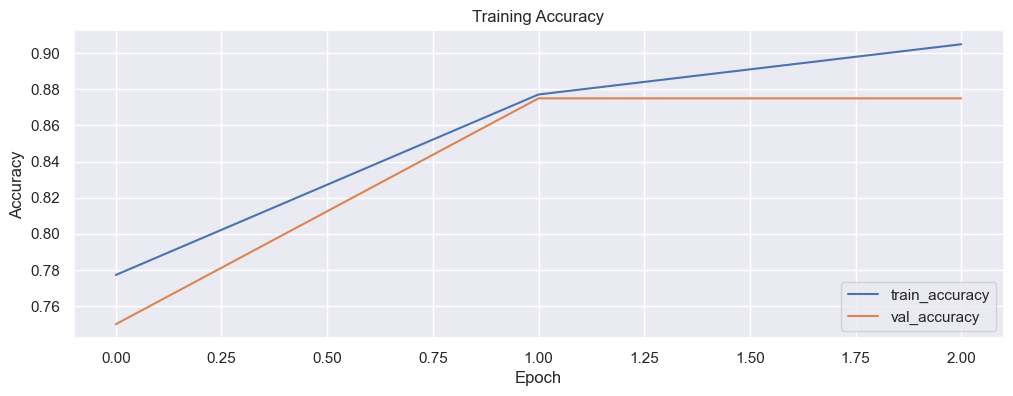

In [212]:
train_accuracy=history3.history['accuracy'][:3]
val_accuracy=history3.history['val_accuracy'][:3]

train_accuracy +=[None]*(3-len(train_accuracy))
val_accuracy +=[None]*(3-len(val_accuracy))

plt.figure(figsize=(12,4))
plt.plot(np.arange(0,3),train_accuracy,label='train_accuracy')
plt.plot(np.arange(0,3),val_accuracy,label='val_accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [213]:
print(accuracy,val_accuracy)

0.875 [0.75, 0.875, 0.875]


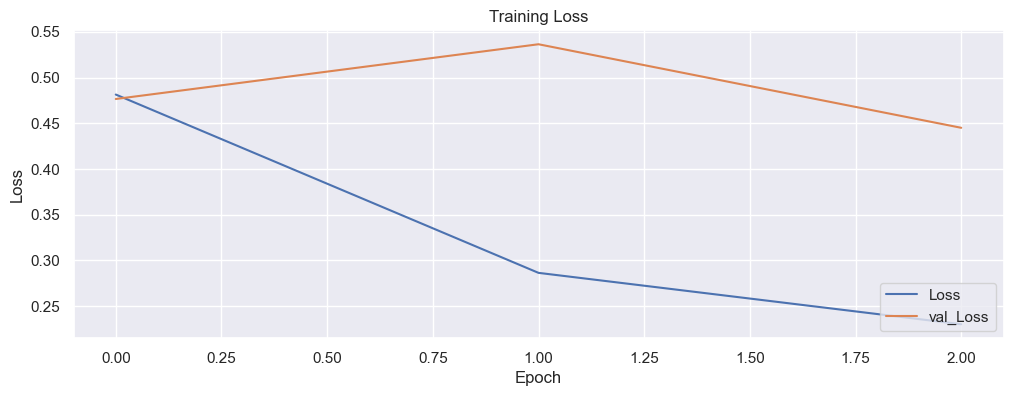

In [216]:
train_loss=history3.history['loss'][:3]
val_loss=history3.history['val_loss'][:3]

train_loss +=[None]*(3-len(train_loss))
val_loss +=[None]*(3-len(val_loss))

plt.figure(figsize=(12,4))
plt.plot(np.arange(0,3),train_accuracy,label='Loss')
plt.plot(np.arange(0,3),val_accuracy,label='val_Loss')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [217]:
print(loss,val_loss)

0.46115830540657043 [0.47657540440559387, 0.5364547371864319, 0.4450531005859375]


In [218]:
loss,accuracy=model3.evaluate(val_generator)
print(f'Loss: {loss}')
print(f'accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7500 - loss: 0.7514
Loss: 0.7513591051101685
accuracy: 0.75


In [226]:
#Exceptional Model

from keras import applications
from keras.layers import Input
from keras.models import Model

In [229]:
excep_base=applications.Xception(weights='imagenet',include_top=False,input_shape=(150,150,3))
excep_base.trainable=False

inputs=Input(shape=(150,150,3))

x=excep_base(inputs,training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.5)(x)

outputs=layers.Dense(2,activation='sigmoid')(x)
excep_model=Model(inputs,outputs)

In [230]:
excep_model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=[keras.metrics.CategoricalAccuracy])

epochs=1
excep_model.fit(train_generator,epochs=epochs,validation_data=val_generator)

164/164 ━━━━━━━━━━━━━━━━━━━━ 93s 547ms/step - categorical_accuracy: 0.8813 - loss: 0.3290 - val_categorical_accuracy: 0.8750 - val_loss: 0.3518


In [232]:
test_loss,test_acu=excep_model.evaluate(test_generator,verbose=0)
print('\naccuracy:',test_acu,'loss:',test_loss)


accuracy: 0.870192289352417 loss: 0.3326885402202606


In [237]:
#use ResNet50

from keras.applications import ResNet50
from keras.layers import Input,GlobalAveragePooling2D,Dense,Dropout
from keras.models import Model

resnet_base=ResNet50(weights='imagenet',include_top=False,input_shape=(150,150,3))
resnet_base.trainable=False

inputs=Input(shape=(150,150,3))

x=resnet_base(inputs,training=False)
x=GlobalAveragePooling2D()(x)
x=Dropout(0.5)(x)

outputs=Dense(2,activation='sigmoid')(x)
resnet_model=Model(inputs,outputs)

resnet_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

resnet_model.fit(train_generator,epochs=2,validation_data=val_generator)

Epoch 1/2
164/164 ━━━━━━━━━━━━━━━━━━━━ 92s 541ms/step - accuracy: 0.7444 - loss: 0.6011 - val_accuracy: 0.5000 - val_loss: 0.8143
Epoch 2/2
164/164 ━━━━━━━━━━━━━━━━━━━━ 102s 614ms/step - accuracy: 0.7449 - loss: 0.5700 - val_accuracy: 0.5000 - val_loss: 0.7936


In [238]:
test_loss,test_acu=resnet_model.evaluate(test_generator,verbose=0)
print('\naccuracy:',test_acu,'loss:',test_loss)


accuracy: 0.625 loss: 0.6652767658233643


In [239]:
#MobileNetV2

from keras.applications import MobileNetV2

mobilenet_base=MobileNetV2(weights='imagenet',include_top=False,input_shape=(150,150,3))
mobilenet_base.trainable=False

inputs=Input(shape=(150,150,3))

x=mobilenet_base(inputs,training=False)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)

outputs=Dense(2,activation='sigmoid')(x)

mobilenet_model=Model(inputs,outputs)

mobilenet_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

mobilenet_model.fit(train_generator,epochs=1,validation_data=val_generator)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 47s 268ms/step - accuracy: 0.8400 - loss: 0.4620 - val_accuracy: 0.8125 - val_loss: 0.4023


In [240]:
test_loss,test_acu=mobilenet_model.evaluate(test_generator,verbose=0)
print('\naccuracy:',test_acu,'loss:',test_loss)


accuracy: 0.875 loss: 0.3046230375766754


In [244]:
#VGG16

VGG_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
VGG_base.trainable=False

inputs=Input(shape=(150,150,3))

x=VGG_base(inputs,training=False)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)

outputs=Dense(2,activation='sigmoid')(x)

VGG_model=Model(inputs,outputs)

VGG_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

VGG_model.fit(train_generator,epochs=1,validation_data=val_generator)


164/164 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.8135 - loss: 0.3914 - val_accuracy: 0.8125 - val_loss: 0.3350


In [245]:
test_loss,test_acu=VGG_model.evaluate(test_generator,verbose=0)
print('\naccuracy:',test_acu,'loss:',test_loss)


accuracy: 0.8717948794364929 loss: 0.3445844054222107


In [246]:
#InceptionV3

from keras.applications import InceptionV3

Inception_base=InceptionV3(weights='imagenet',include_top=False,input_shape=(150,150,3))
Inception_base.trainable=False

inputs=Input(shape=(150,150,3))

x=Inception_base(inputs,training=False)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)

outputs=Dense(2,activation='sigmoid')(x)

Inception_model=Model(inputs,outputs)

Inception_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

Inception_model.fit(train_generator,epochs=1,validation_data=val_generator)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 58s 327ms/step - accuracy: 0.8597 - loss: 0.7201 - val_accuracy: 0.8750 - val_loss: 0.4207


In [247]:
test_loss,test_acu=Inception_model.evaluate(test_generator,verbose=0)
print('\naccuracy:',test_acu,'loss:',test_loss)


accuracy: 0.8317307829856873 loss: 0.4132751524448395


In [248]:
#DenseNet121

from keras.applications import DenseNet121

densenet_base=DenseNet121(weights='imagenet',include_top=False,input_shape=(150,150,3))
densenet_base.trainable=False

inputs=Input(shape=(150,150,3))

x=densenet_base(inputs,training=False)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)

outputs=Dense(2,activation='sigmoid')(x)

densenet_model=Model(inputs,outputs)

densenet_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

densenet_model.fit(train_generator,epochs=1,validation_data=val_generator)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 94s 530ms/step - accuracy: 0.8639 - loss: 0.3411 - val_accuracy: 0.8750 - val_loss: 0.2297


In [249]:
test_loss,test_acu=densenet_model.evaluate(test_generator,verbose=0)
print('\naccuracy:',test_acu,'loss:',test_loss)


accuracy: 0.8605769276618958 loss: 0.33790451288223267


In [250]:
#NASNetMobile

from keras.applications import NASNetMobile

NASnet_base=NASNetMobile(weights='imagenet',include_top=False,input_shape=(150,150,3))
NASnet_base.trainable=False

inputs=Input(shape=(150,150,3))

x=NASnet_base(inputs,training=False)
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)

outputs=Dense(2,activation='sigmoid')(x)

NASnet_model=Model(inputs,outputs)

NASnet_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

NASnet_model.fit(train_generator,epochs=1,validation_data=val_generator)


19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 59s 310ms/step - accuracy: 0.8444 - loss: 0.4032 - val_accuracy: 0.8750 - val_loss: 0.1907


In [251]:
test_loss,test_acu=NASnet_model.evaluate(test_generator,verbose=0)
print('\naccuracy:',test_acu,'loss:',test_loss)


accuracy: 0.8461538553237915 loss: 0.36487245559692383
